In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [19]:
link_dataset = "dulieu_1.xlsx"

df = pd.read_excel(link_dataset)
print(df)
print(type(df))

    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4       Unnamed: 5
0          NaN          A          B          C          D            CLASS
1          NaN          7        3.2        4.7        1.4  Iris-versicolor
2          NaN        6.4        3.2        4.5        1.5  Iris-versicolor
3          NaN        6.9        3.1        4.9        1.5  Iris-versicolor
4          NaN        5.5        2.3          4        1.3  Iris-versicolor
5          NaN        6.5        2.8        4.6        1.5  Iris-versicolor
6          NaN        5.7        2.8        4.5        1.3  Iris-versicolor
7          NaN        6.3        3.3        4.7        1.6  Iris-versicolor
8          NaN        4.9        2.4        3.3          1  Iris-versicolor
9          NaN        6.6        2.9        4.6        1.3  Iris-versicolor
10         NaN        5.2        2.7        3.9        1.4  Iris-versicolor
11         NaN        6.3        3.3          6        2.5   Iris-virginica
12         N

# Mục mới

In [24]:
inputs =  pd.DataFrame(df.values[1:,1:5]) #lấy dữ liệu từ dòng 1 đến hết, và từ cột 1 -> cột 5-1 =4
inputs


,0,1,2,3
0,7,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4,1.3
4,6.5,2.8,4.6,1.5
5,5.7,2.8,4.5,1.3
6,6.3,3.3,4.7,1.6
7,4.9,2.4,3.3,1
8,6.6,2.9,4.6,1.3
9,5.2,2.7,3.9,1.4


In [27]:
target = df.values[1:,-1] #lấy dữ liệu từ dòng 1 đến hết, lấy cột cuối cùng (-1)
target

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder


In [33]:
le_target = LabelEncoder()
print(le_target)

LabelEncoder()


In [34]:
target_n = le_target.fit_transform(target)
print(target_n)
target_n

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
model_entropy = DecisionTreeClassifier(criterion="entropy",random_state=43)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,target_n,test_size=0.3)
model_entropy.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=43)

In [40]:
X_test

,0,1,2,3
11,5.8,2.7,5.1,1.9
13,6.3,2.9,5.6,1.8
10,6.3,3.3,6,2.5
8,6.6,2.9,4.6,1.3
5,5.7,2.8,4.5,1.3
4,6.5,2.8,4.6,1.5


In [41]:
y_pred = model_entropy.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Accuracy : ",
      accuracy_score(y_pred, y_test)*100)
print("Report : \n",
      classification_report(y_test, y_pred))

Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



[Text(0.5, 0.75, 'x[3] <= 1.65\nentropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.625, 0.5, '  False')]

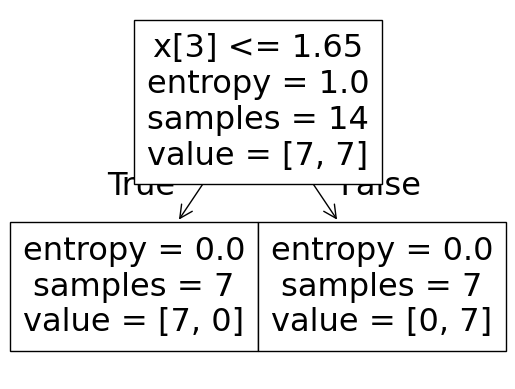

In [44]:
plot_tree(model_entropy)